In [1]:
import xarray as xr
import numpy as np
import matplotlib.cm as cm
import matplotlib.pylab as plt
import os
import time

In [2]:
start_time = time.time()
ruta = os.getcwd()+'/'

runs  = [ruta+'ArchivosNati/000300/level01_ts']#,ruta+'Mw=9.0/Escenario4/layer01_ts',ruta+'Mw=9.5/Escenario8/layer01_ts']
boyas = range(38)   # cantidad total de boyas
lim_boya_valpo = 0  # última boya de valpo
carpeta='Resultados_python/'
Escenario = 'ArchivosNati/000300/' #modificar según escenarios que compare
fold_eta='eta'
fold_ux='ux'
fold_uy='uy'
fold_mom_x='mom_x'
fold_mom_y='mom_y'
#fold_fza_x='fza_x'
#fold_fza_y='fza_y'
if not os.path.exists(Escenario+carpeta+fold_eta): # crea folder si no existe
    os.makedirs(Escenario+carpeta+fold_eta)
if not os.path.exists(Escenario+carpeta+fold_ux): # crea folder si no existe
    os.makedirs(Escenario+carpeta+fold_ux)
if not os.path.exists(Escenario+carpeta+fold_uy): # crea folder si no existe
    os.makedirs(Escenario+carpeta+fold_uy)
if not os.path.exists(Escenario+carpeta+fold_mom_x): # crea folder si no existe
    os.makedirs(Escenario+carpeta+fold_mom_x)
if not os.path.exists(Escenario+carpeta+fold_mom_y): # crea folder si no existe
    os.makedirs(Escenario+carpeta+fold_mom_y)

#if not os.path.exists(carpeta+Escenario+fold_fza_x): # crea folder si no existe
 #   os.makedirs(carpeta+Escenario+fold_fza_x)
#if not os.path.exists(carpeta+Escenario+fold_fza_y): # crea folder si no existe
 #   os.makedirs(carpeta+Escenario+fold_fza_y)
print("--- %s seconds ---" % (time.time() - start_time))
#print ruta

--- 0.00142312049866 seconds ---


In [5]:
mod  = ['bat_l4_serecoq_escenario4','bat_l4_vinavalpo_escenario4']
bases = {}
for m in mod:
    base = xr.open_dataset(ruta+m+'.grd')
    bases[m]=base

In [6]:
base_coq = bases['bat_l4_serecoq_escenario4']
base_valpo = bases['bat_l4_vinavalpo_escenario4']
lon_coq = base_coq.variables['x'][:].data
lat_coq = base_coq.variables['y'][:].data
grd_coq = base_coq.variables['z'][:].data

lon_valpo = base_valpo.variables['x'][:].data
lat_valpo = base_valpo.variables['y'][:].data
grd_valpo = base_valpo.variables['z'][:].data

c_agua = plt.cm.Blues_r(np.linspace(0,0.5,128))
c_terr = plt.cm.copper(np.linspace(0.25,0.75,128))
cols   = np.vstack((c_agua, c_terr))
cmap   = cm.colors.LinearSegmentedColormap.from_list("q", cols)

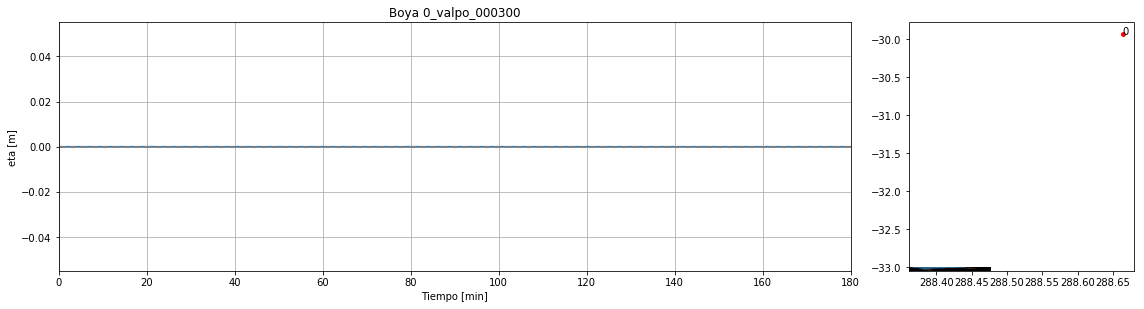

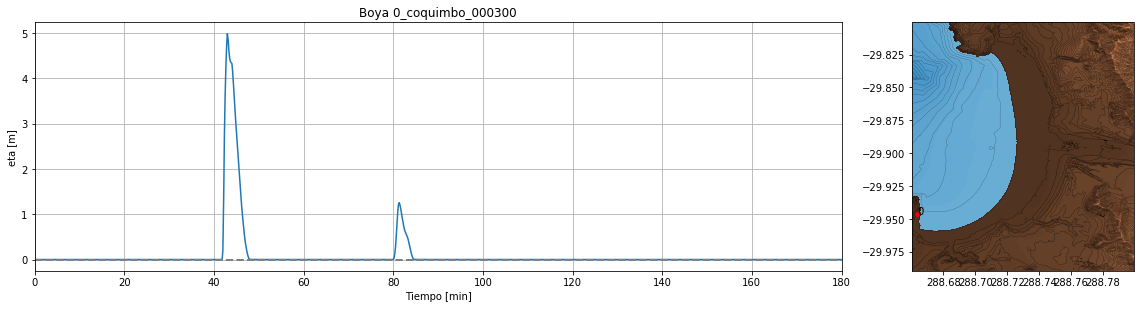

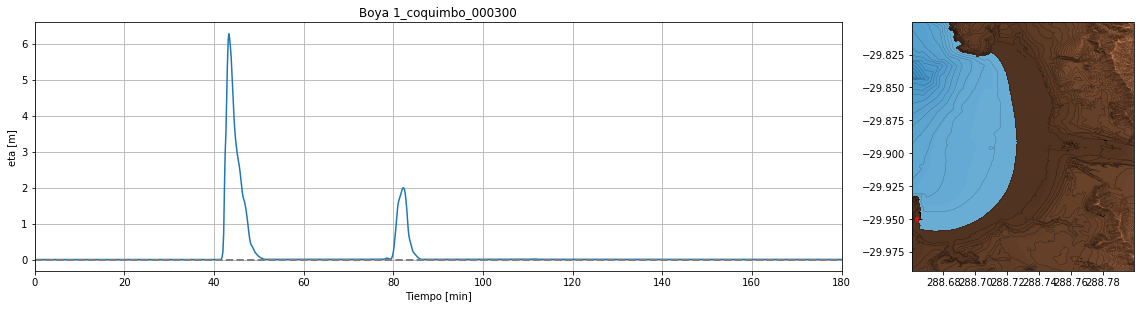

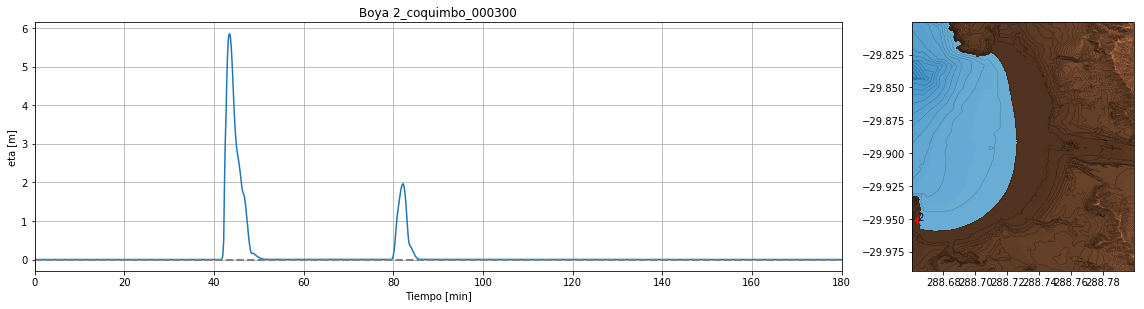

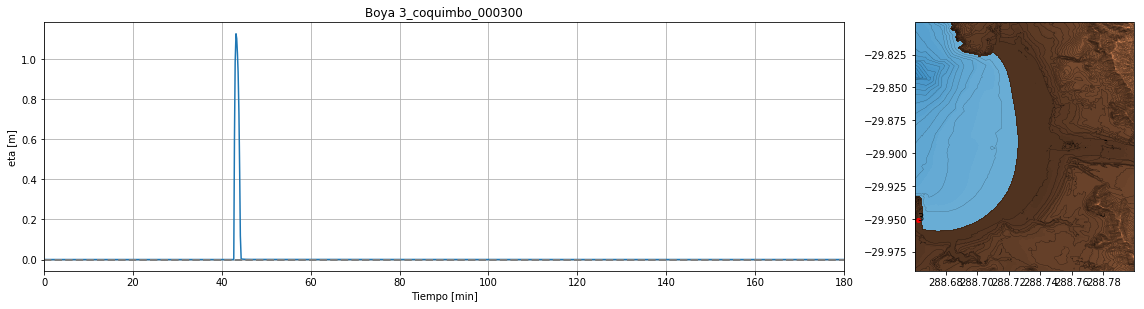

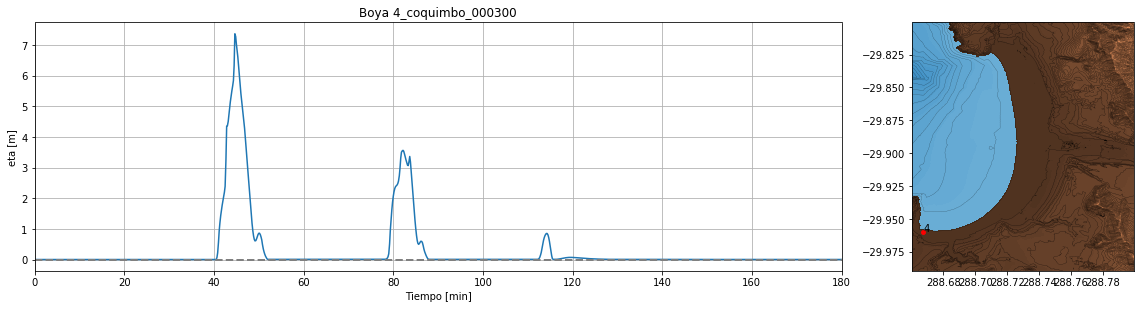

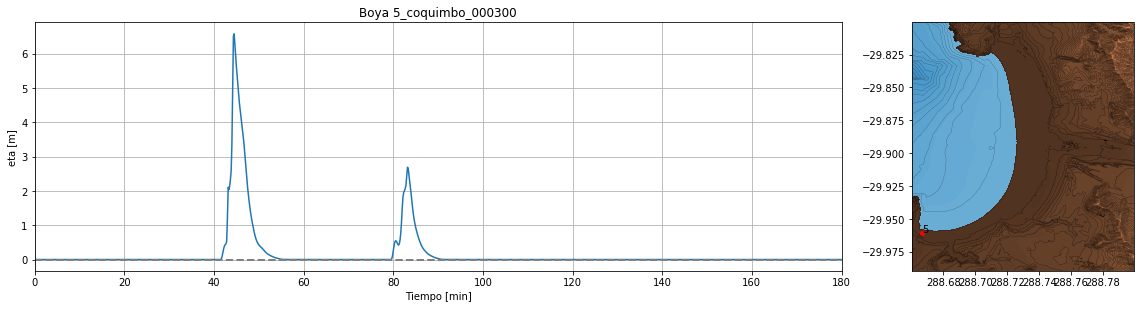

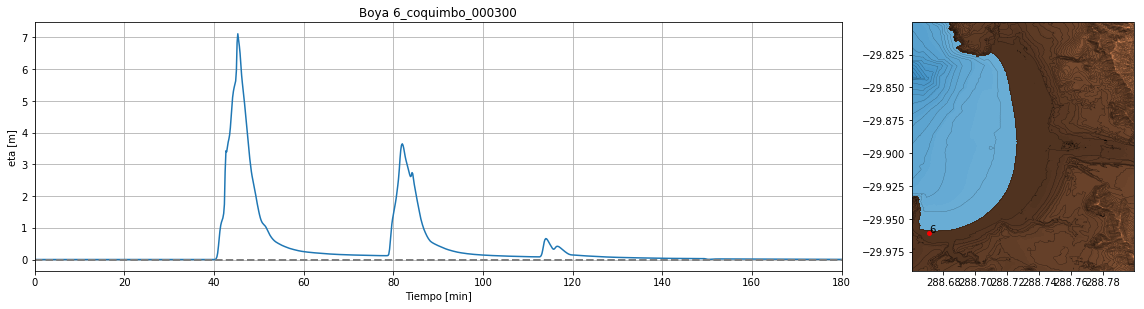

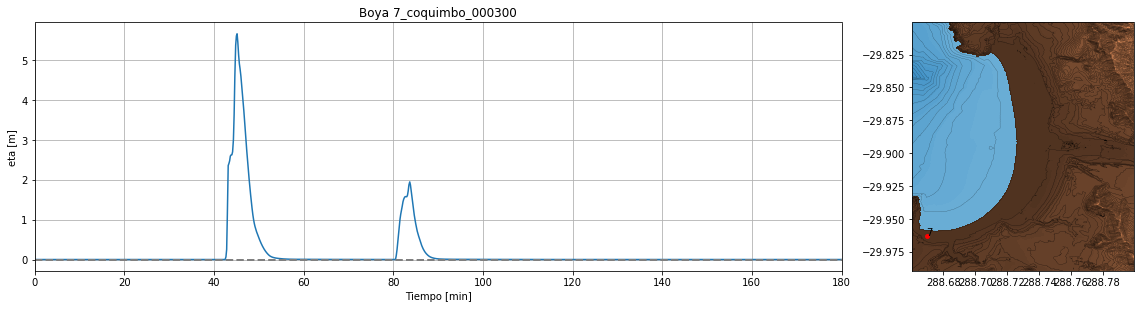

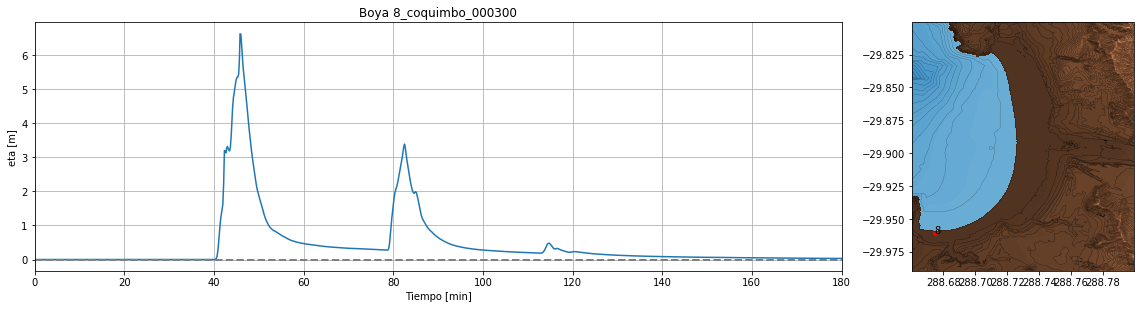

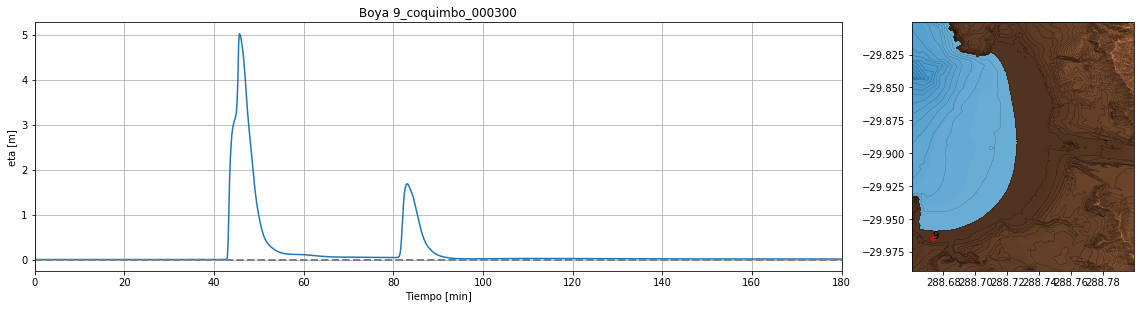

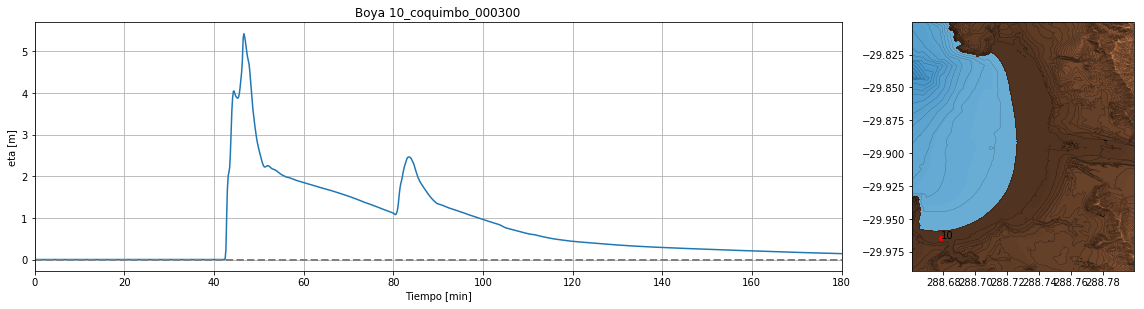

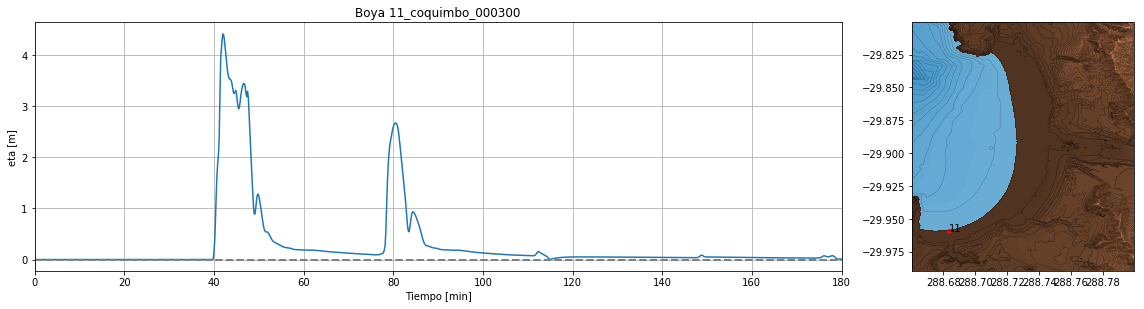

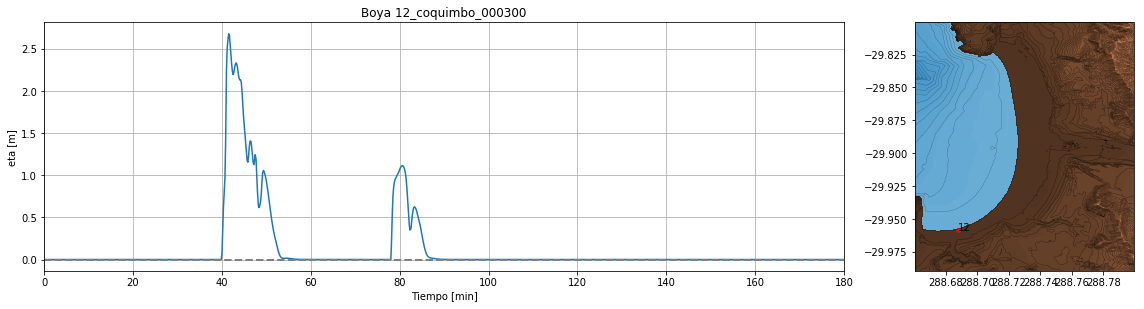

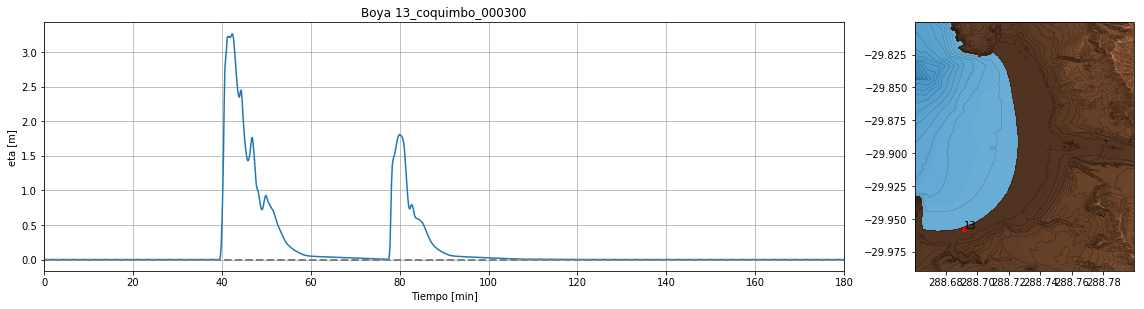

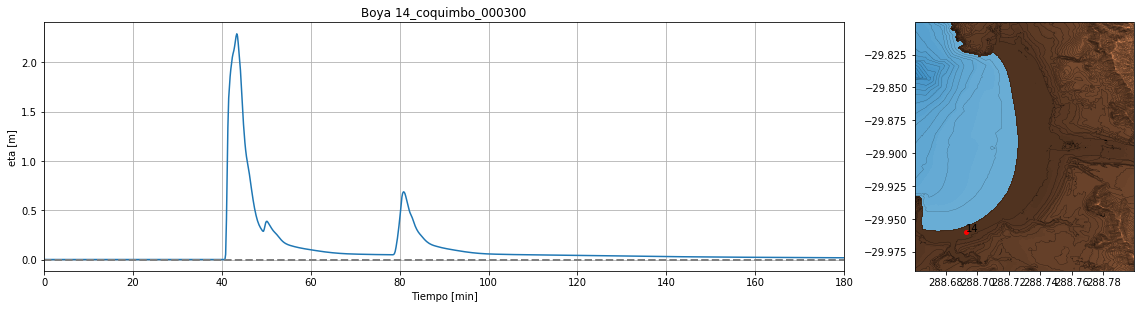

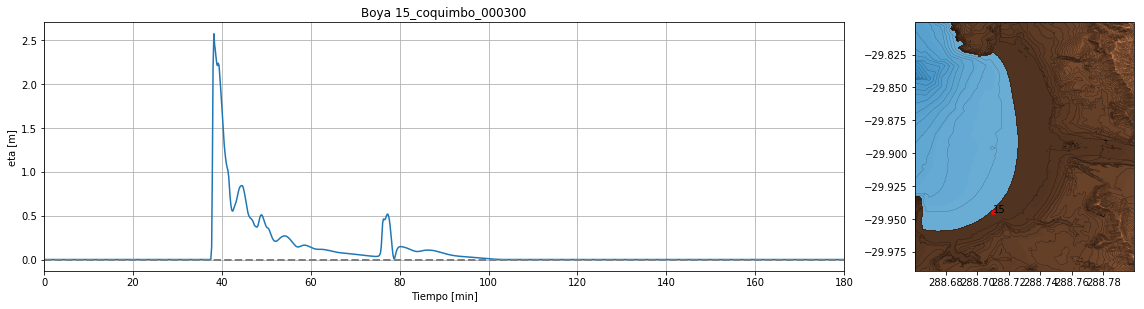

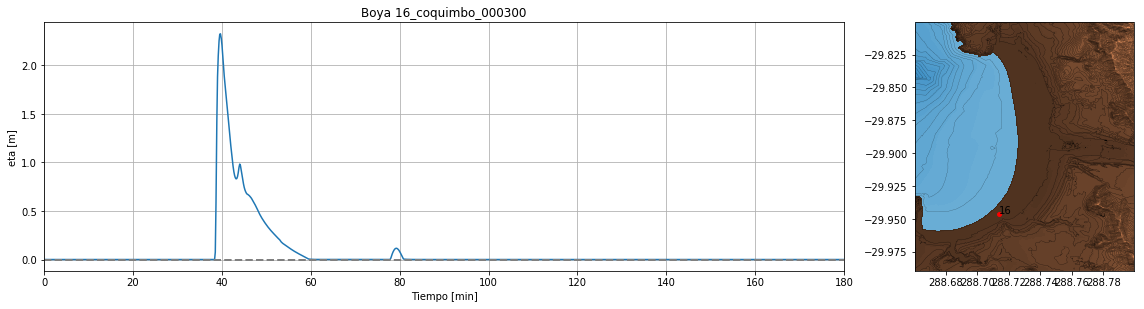

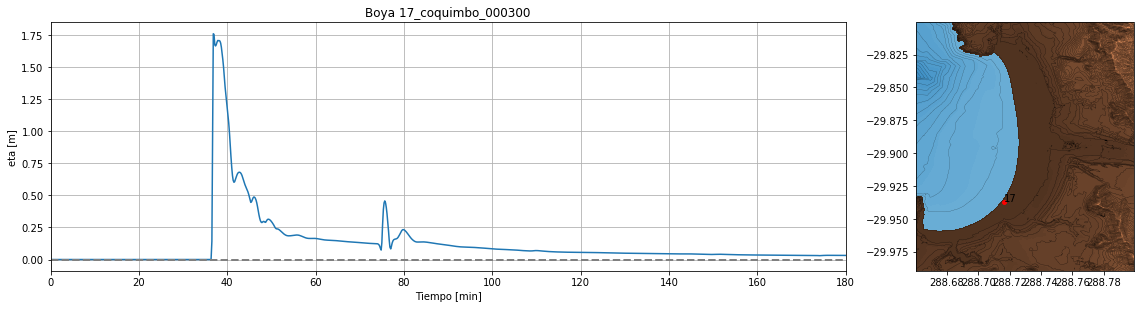

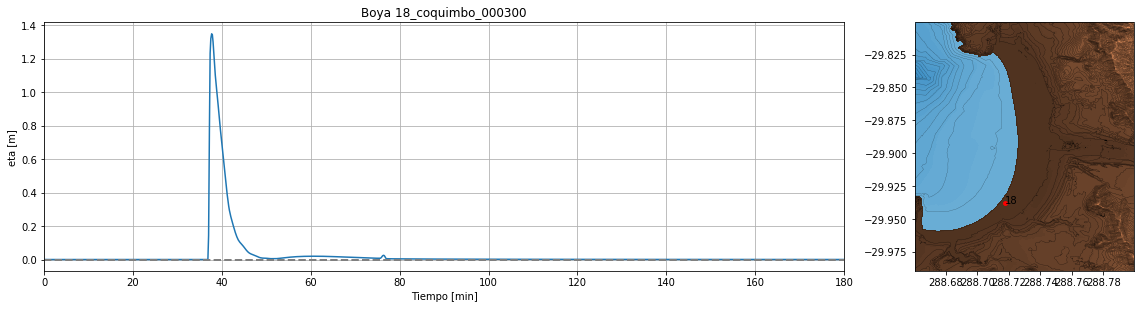

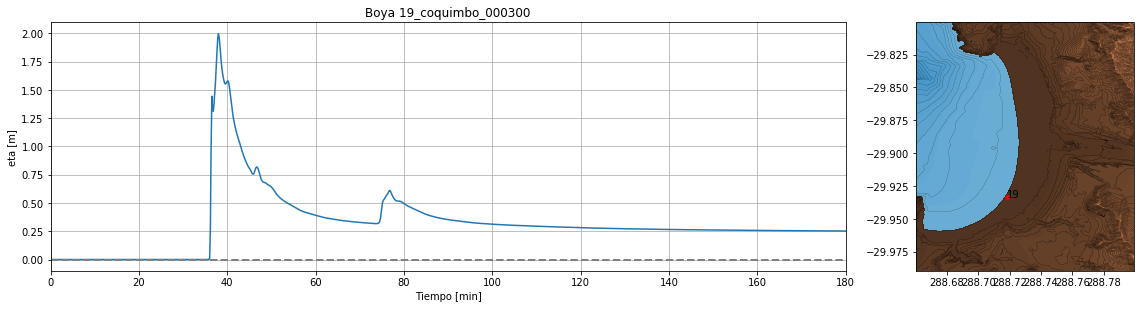

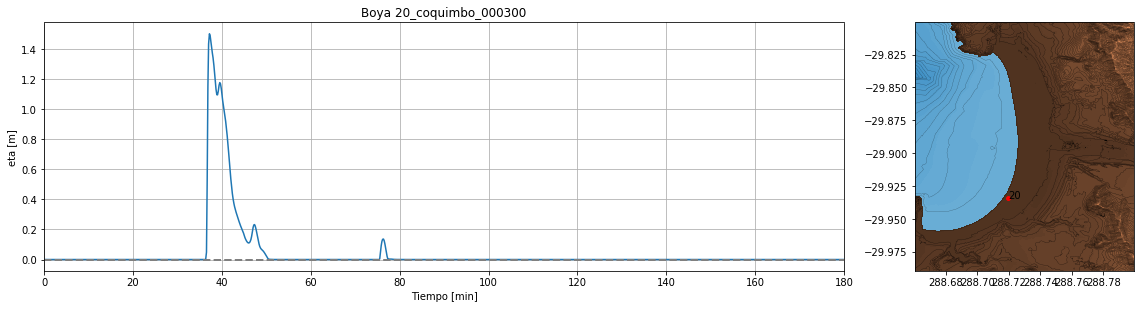

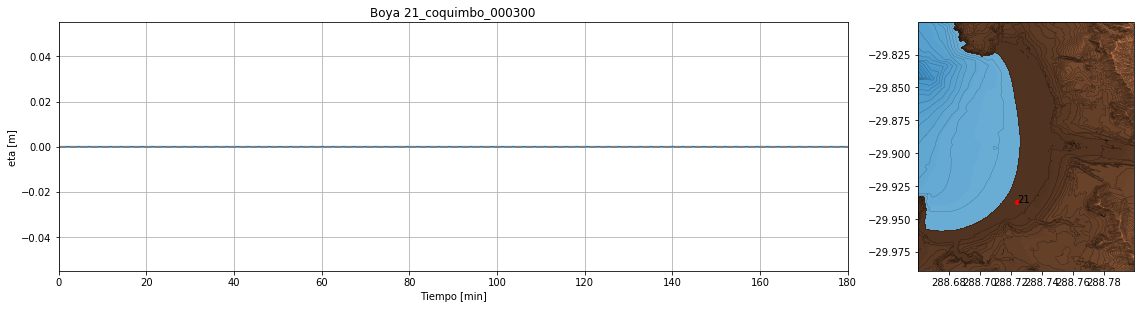

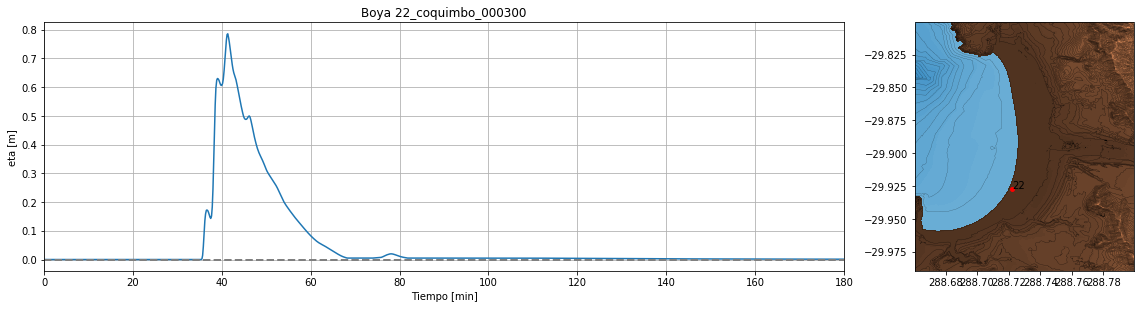

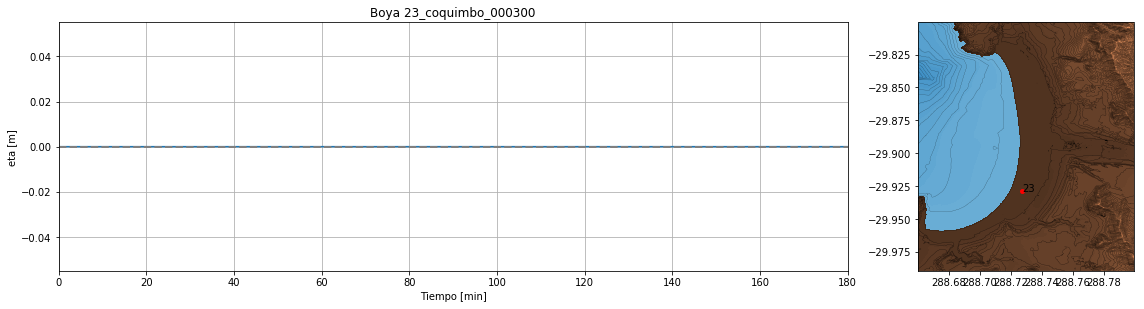

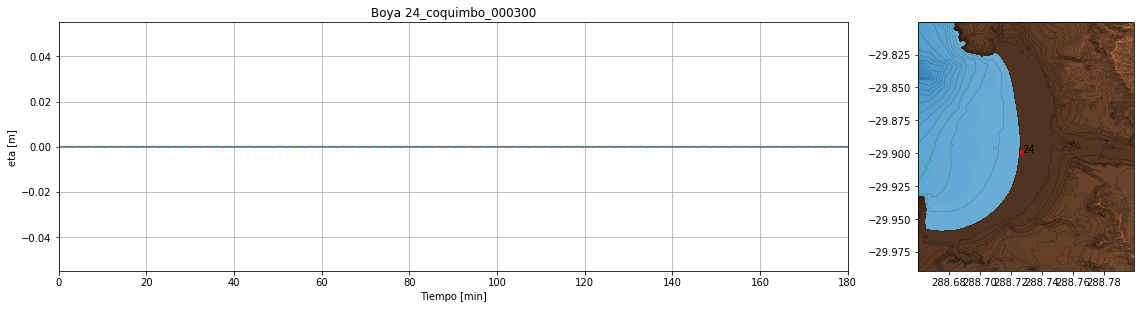

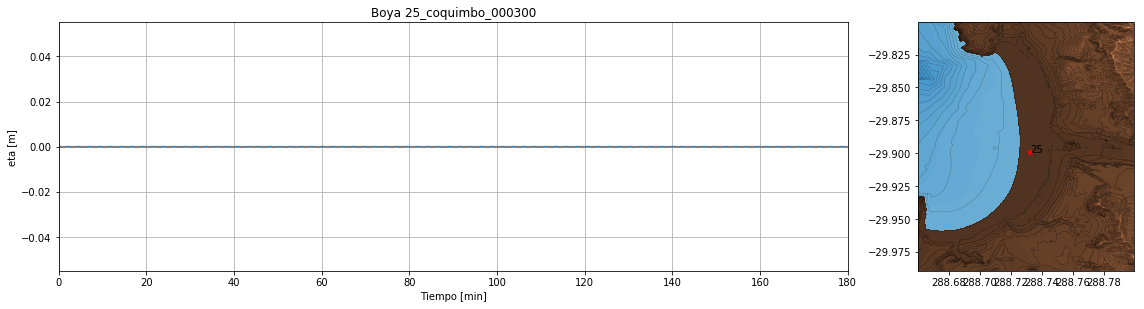

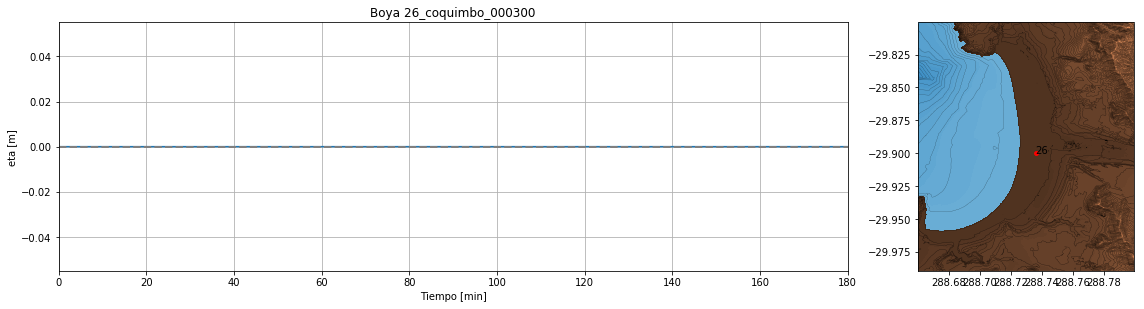

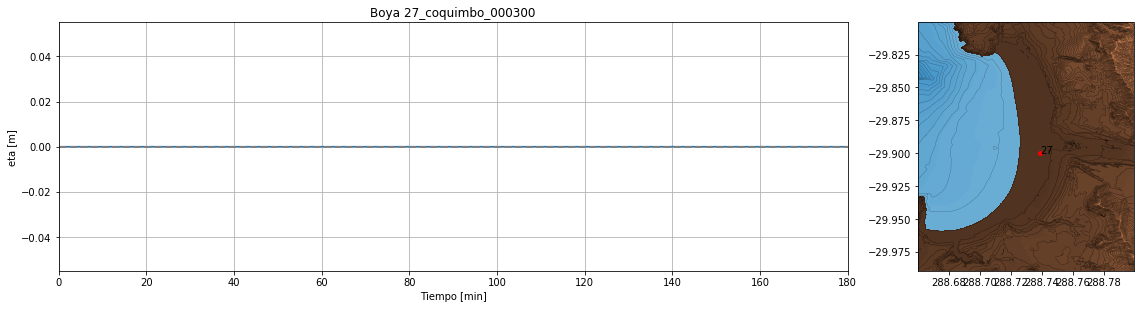

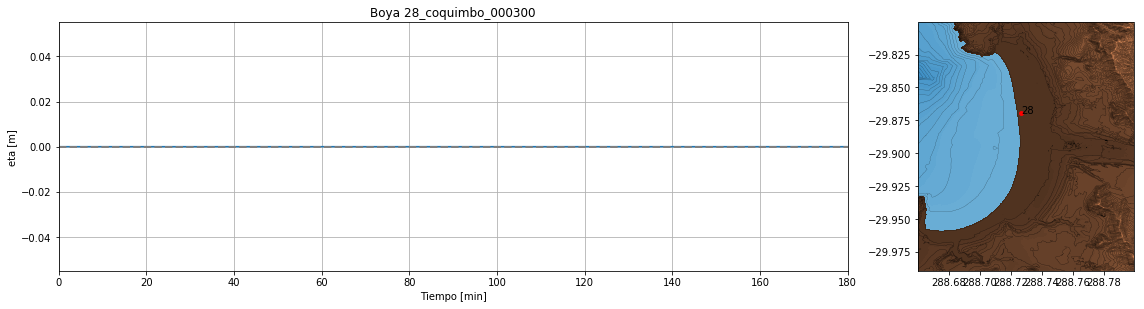

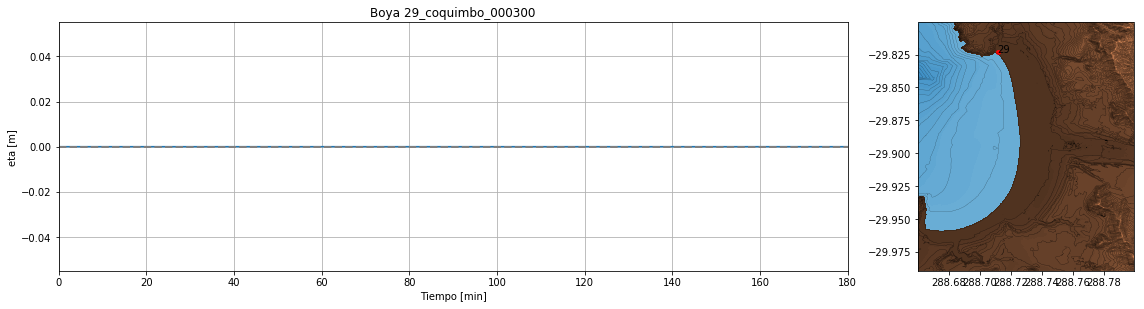

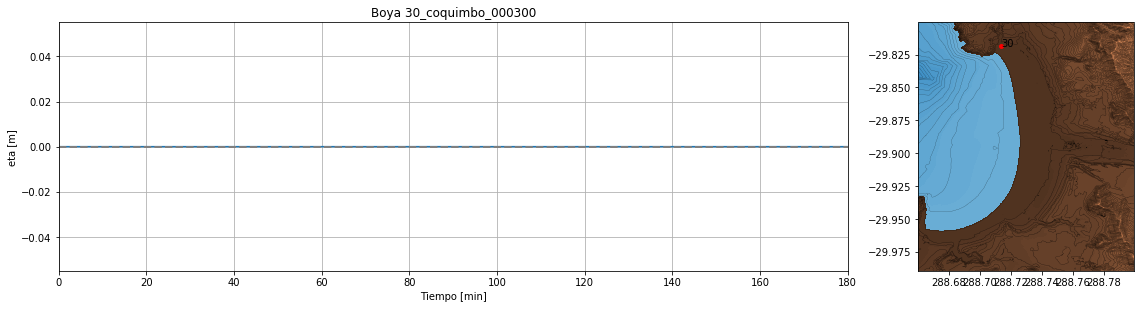

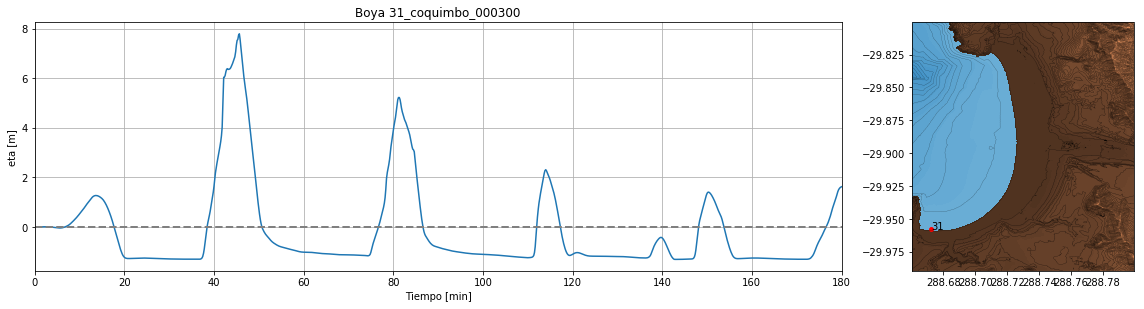

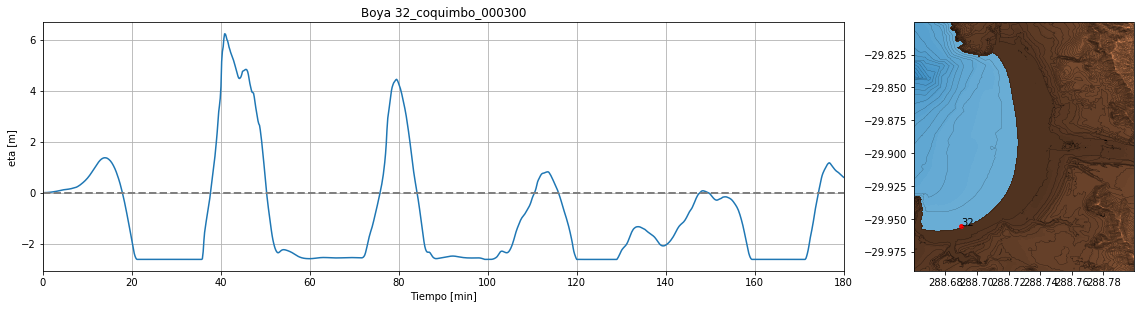

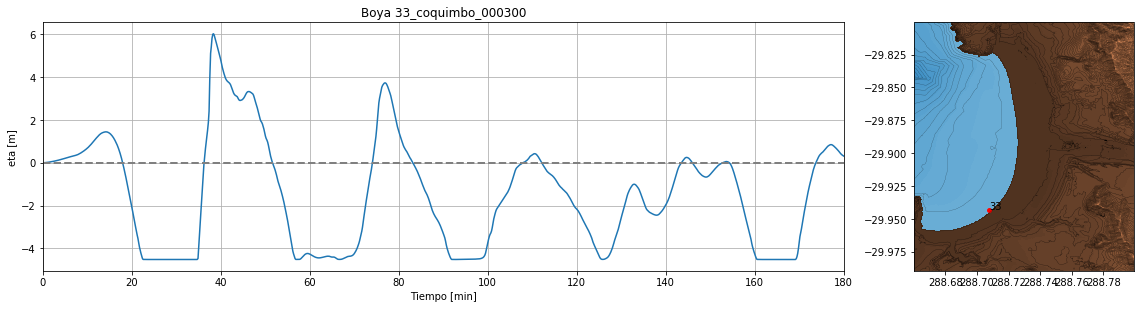

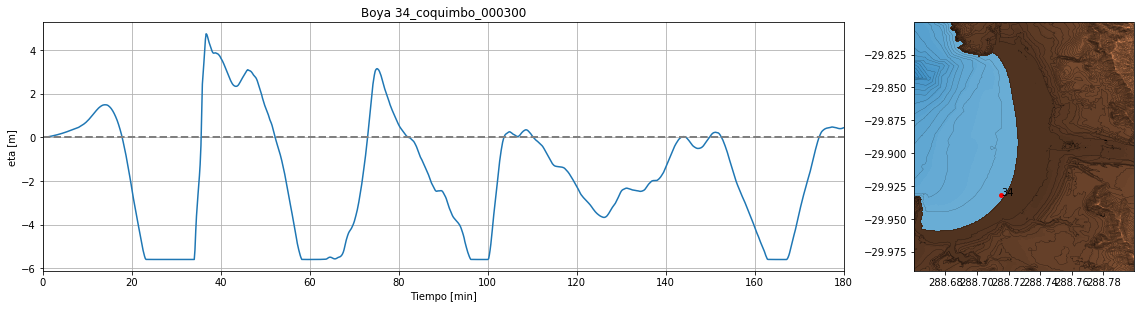

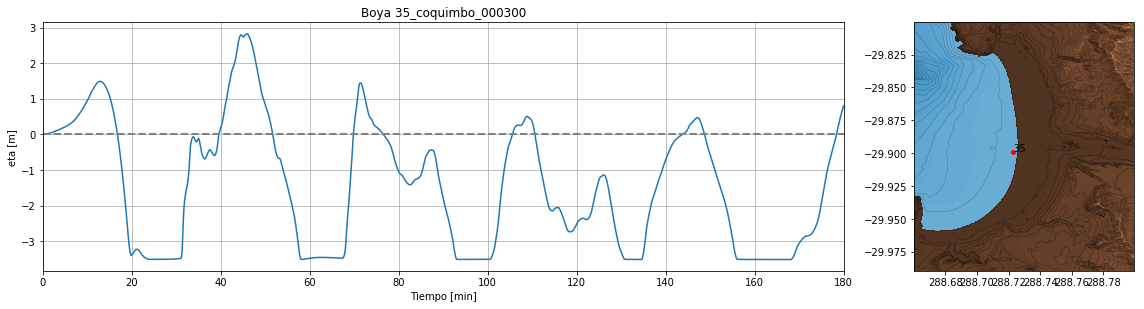

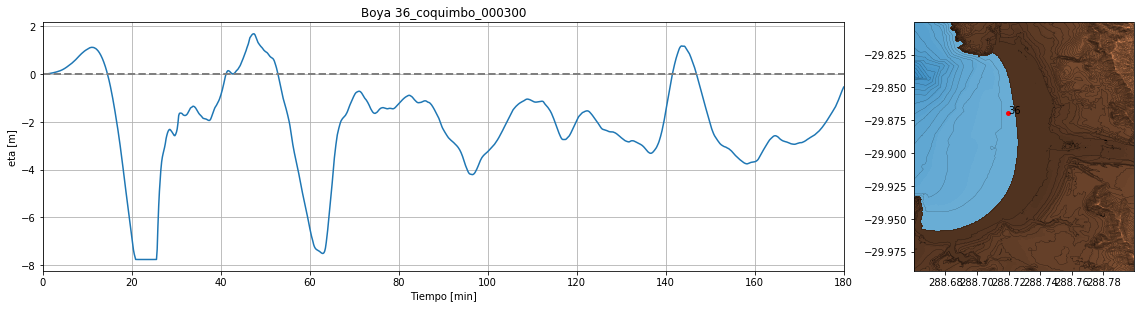

--- 592.334789038 seconds ---


In [8]:
#eta
start_time = time.time()

x = np.linspace(0, 180, 100)
y = np.zeros(100)
for i in boyas:
    fig = plt.figure(figsize=(16, 8))
    #fig = plt.figure(figsize=(16, 8))
    a1 = plt.subplot2grid((8,4),(0,0),rowspan=4,colspan = 3)
    a2 = plt.subplot2grid((8,4),(0,3), rowspan = 4, colspan =4)
    #a3 = plt.subplot2grid((8,4),(2,3),rowspan = 2,colspan=1)
    #plt.figure(figsize=(14,6), dpi=90)
    #plt.axes([0, 0, 1, 0.5])
    
    for j in runs:
                
        if j==runs[0]:
            ratio='|ratio: [2 8 8] res:7 mts, tpo: 21h 41min'  #cambiar ratios y resolución según escenarios
        elif j==runs[1]:
            ratio='|ratio: [2 8 8] res:7 mts, tpo: 21h 41min'
        elif j==runs[2]:
            ratio='|ratio: [2 4 8] res:14 mts, tpo: 1h 40min'
        else:
            ratio='|ratio: [2 2 8] res:28 mts, tpo: 30min'
        base = xr.open_dataset(j+'.nc')
        
        lon  = base.variables['longitude'][:].data
        lat  = base.variables['latitude'][:].data
        
        eta  = base.variables['eta'][:].data
        times = base.variables['time'][:].data
        time_i = np.zeros(times.shape[0])
        for k in range(0,times.shape[0]):
            texto2 = str(times[k]).split(':')
            texto1 = texto2[0].split('T')
            seg = float(texto2[2])
            mnt = float(texto2[1])
            hrs = float(texto1[1])
            time_i[k]=hrs*60+mnt+seg/60  
        a1.plot(time_i, eta[:,i]-eta[:,i][0]) #label=j.split('=')[1].split('/layer01')[0]+ratio)
        
        #plt.plot(time_i, eta[:,i], label=j.split('=')[1].split('/layer01')[0]+ratio)
    #plt.scatter(t, h, color='purple',s=1)
    
    a1.plot(x, y, color='grey',linewidth=2, linestyle='dashed')
    a1.set_xlim((0,180))
    #plt.ylim((-8,8))
    if i<=lim_boya_valpo:
        a1.set_title('Boya '+str(i)+'_valpo_'+Escenario.split('/')[1])
        a1.set_xlabel('Tiempo [min]')
        a1.set_ylabel('eta [m]')
        a1.grid(True)
        
        a2.contour(lon_valpo,lat_valpo,grd_valpo, 80, linewidths=0.2, colors='k')
        a2.contourf(lon_valpo,lat_valpo,grd_valpo, 50,cmap=cmap,
                        vmax=abs(grd_valpo).max(), vmin=-abs(grd_valpo).max(),zorder =1)
        #a2.set_xlim(lon_valpo.min()-0.015,lon_valpo.max())
        #a2.set_ylim(lat_valpo.min(),lat_valpo.max()+0.06)
        a2.scatter(lon[i], lat[i], s=15, color='red')
        a2.annotate(str(i), (lon[i], lat[i]))
        
        plt.tight_layout()
        plt.show()
        #a1.set_legend(loc='upper right')
        fig.savefig(ruta+Escenario+carpeta+fold_eta+'/'+'Valpo_eta_Boya_'+str(i)+'_' +Escenario.split('/')[1]+ '.png', bbox_inches='tight', dpi=600)
        
        
        
    else:
        a1.set_title('Boya '+str(i-(lim_boya_valpo+1))+'_coquimbo_'+Escenario.split('/')[1])
        a1.set_xlabel('Tiempo [min]')
        a1.set_ylabel('eta [m]')
        a1.grid(True)
        
        a2.contour(lon_coq,lat_coq,grd_coq, 80, linewidths=0.2, colors='k')
        a2.contourf(lon_coq,lat_coq,grd_coq, 50,cmap=cmap,
                        vmax=abs(grd_coq).max(), vmin=-abs(grd_coq).max(),zorder =1)
        #a2.set_xlim(lon_coq.min()-0.015,lon_coq.max())
        #a2.set_ylim(lat_coq.min(),lat_coq.max()+0.06)
        a2.scatter(lon[i], lat[i], s=15, color='red')
        a2.annotate(str(i-(lim_boya_valpo+1)), (lon[i], lat[i]))
        
        plt.tight_layout()
        plt.show()
        #a1.set_legend(loc='upper right')
        fig.savefig(ruta+Escenario+carpeta+fold_eta+'/'+'Coquimbo_eta_Boya_'+str(i-(lim_boya_valpo+1))+'_'+Escenario.split('/')[1] + '.png', bbox_inches='tight', dpi=600)
        
        
print("--- %s seconds ---" % (time.time() - start_time))
